In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from  IPython import display
import pathlib
import shutil
import tempfile
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

load dataset

In [ ]:
df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
compression='zip', low_memory=False)
df.shape

(1306122, 3)

distribution of inscinerity

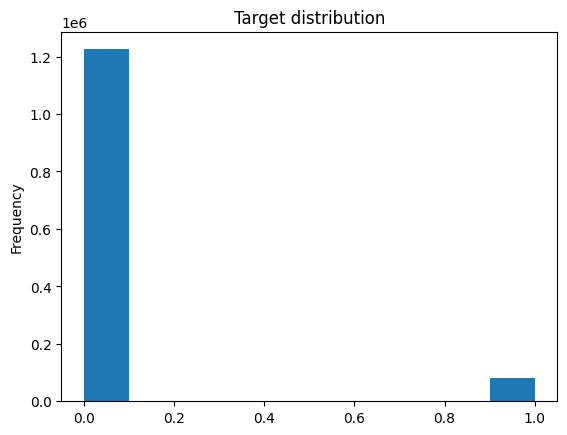

In [ ]:
df['target'].plot(kind='hist', title='Target distribution');

In [ ]:
from sklearn.model_selection import train_test_split
train_df, remaining = train_test_split(df, random_state=42, train_size=0.01, stratify=df.target.values)
valid_df, _ = train_test_split(remaining, random_state=42, train_size=0.001, stratify=remaining.target.values)
train_df.shape, valid_df.shape

((13061, 3), (1293, 3))

tensorflow hub

In [ ]:
module_url = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1" #@param ["https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1", "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1", "https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"] {allow-input: true}

Train model function

In [ ]:
def train_and_evaluate_model(module_url, embed_size, name, trainable=False):

  hub_layer = hub.KerasLayer(module_url, input_shape=[], output_shape= [embed_size], dtype=tf.string, trainable=trainable)

  model = tf.keras.models.Sequential([
      hub_layer,
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense (64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.BinaryAccuracy(name='accuracy')])
  model.summary()
  history = model.fit(train_df['question_text'],
                      train_df['target'],
                      epochs=100,
                      batch_size=32,
                      validation_data=(valid_df['question_text'], valid_df['target']),
                      callbacks=[tfdocs.modeling.EpochDots(),
                                tf.keras.callbacks.EarlyStopping(monitor='val loss', patience=2, mode='min'),
                                tf.keras.callbacks.TensorBoard(logdir/name)],
                                  verbose=0)

  return history


train transfer models

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [ ]:
histories = {}

In [ ]:
module_url = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1" #@param ["https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1", "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1", "https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"] {allow-input: true}

In [ ]:
histories['nnlm-en-dim50'] = train_and_evaluate_model(module_url, embed_size=20, name='nnlm-en-dim50')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 421909 (1.61 MB)
Trainable params: 21889 (85.50 KB)
Non-trainable params: 400020 (1.53 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9374,  loss:0.2524,  val_accuracy:0.9389,  val_loss:0.1962,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [ ]:
histories['nnim-en-dim128'] = train_and_evaluate_model(module_url, embed_size=50, name='nnim-en-dim128')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense_3 (Dense)             (None, 256)               5376      
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 421909 (1.61 MB)
Trainable params: 21889 (85.50 KB)
Non-trainable params: 400020 (1.53 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9205,  loss:0.2869,  val_accuracy:0.9381,  val_loss:0.2036,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [ ]:
histories['nnim-en-dim128'] = train_and_evaluate_model(module_url, embed_size=128, name='nnlm-en-dim128')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense_6 (Dense)             (None, 256)               5376      
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 421909 (1.61 MB)
Trainable params: 21889 (85.50 KB)
Non-trainable params: 400020 (1.53 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9340,  loss:0.2652,  val_accuracy:0.9381,  val_loss:0.1995,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [ ]:
histories['gnews-swivel-20dim'] = train_and_evaluate_model(module_url, embed_size=20, name='gnews-swivel-20dim')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense_9 (Dense)             (None, 256)               5376      
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 421909 (1.61 MB)
Trainable params: 21889 (85.50 KB)
Non-trainable params: 400020 (1.53 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9306,  loss:0.2738,  val_accuracy:0.9381,  val_loss:0.2007,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [17]:
histories['universal-sentence-encoder'] = train_and_evaluate_model(module_url, embed_size=512, name='universal-sentence-encoder')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 20)                400020    
                                                                 
 dense_15 (Dense)            (None, 256)               5376      
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 421909 (1.61 MB)
Trainable params: 21889 (85.50 KB)
Non-trainable params: 400020 (1.53 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9349,  loss:0.2661,  val_accuracy:0.9381,  val_loss:0.2009,  
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

evaluate models

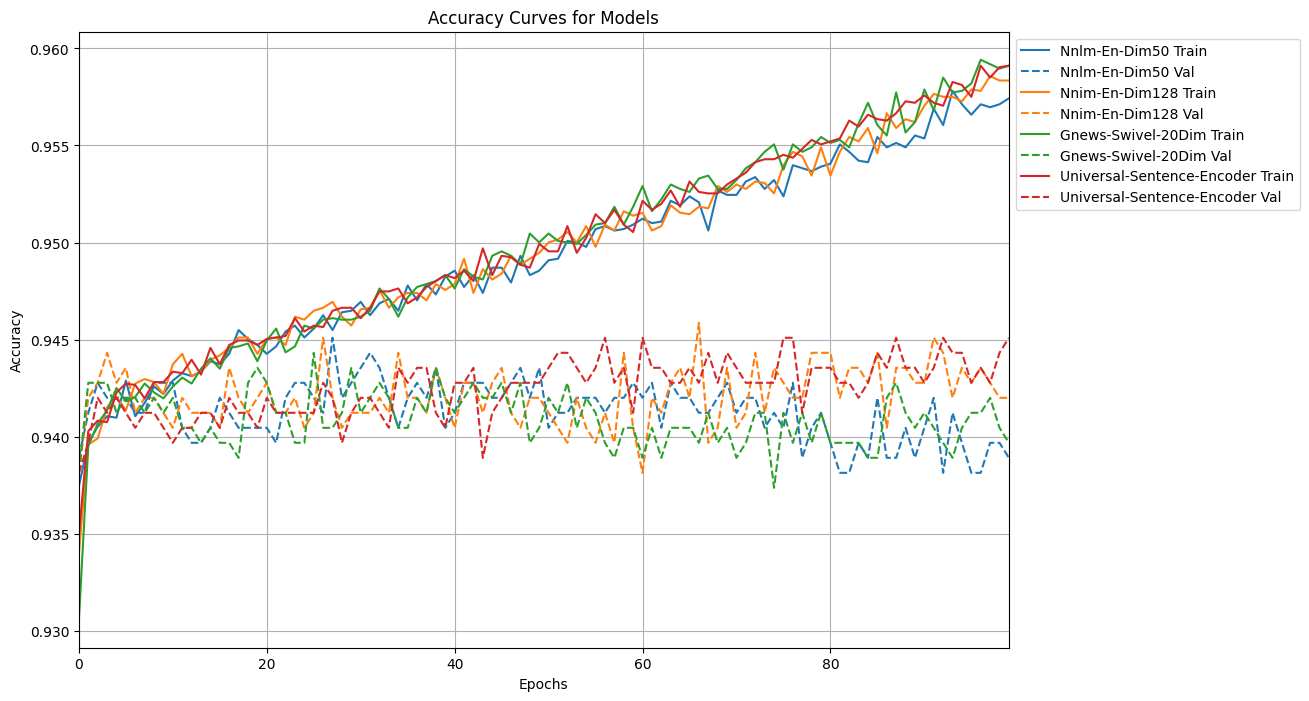

In [18]:
plt.rcParams['figure.figsize'] = (12, 8)
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Accuracy Curves for Models")
plt.show()

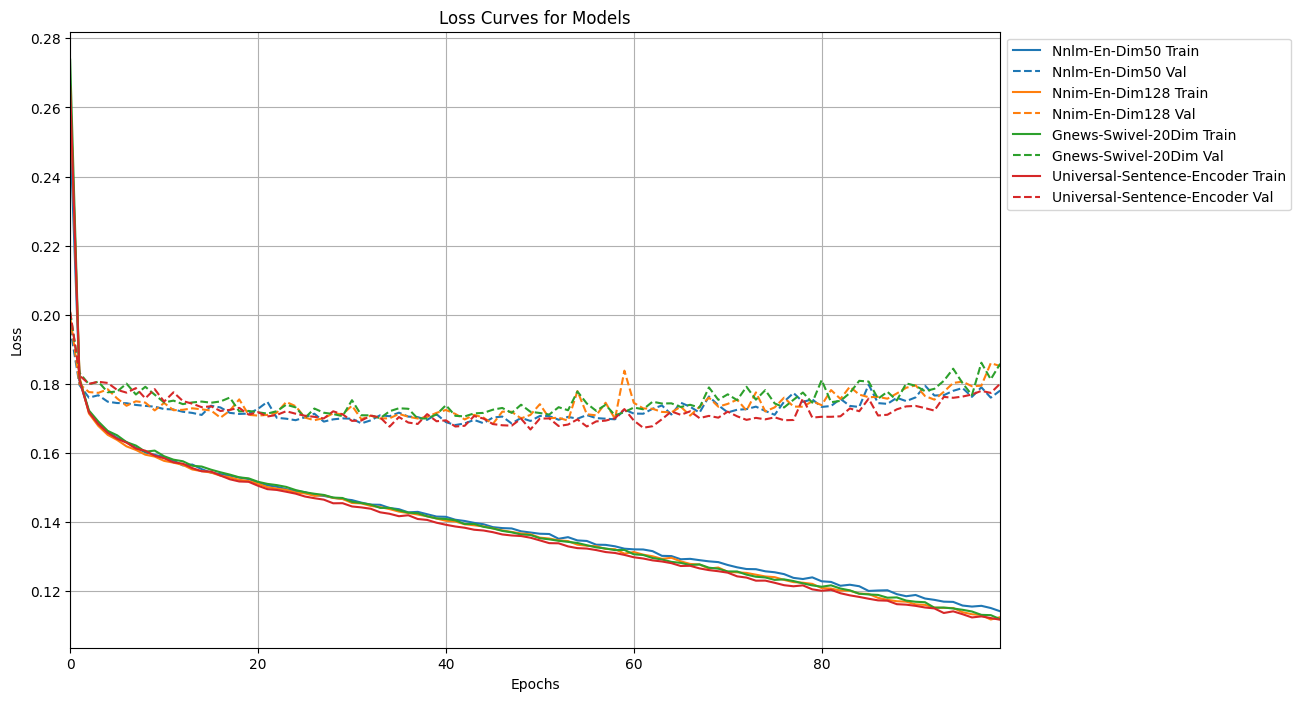

In [19]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Loss Curves for Models")
plt.show()